In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def derifw(func,x,dx):
    return (func(x+dx)-func(x))/dx

def dericd(func,x,dx):
    return (func(x+dx/2.) - func(x-dx/2.))/dx

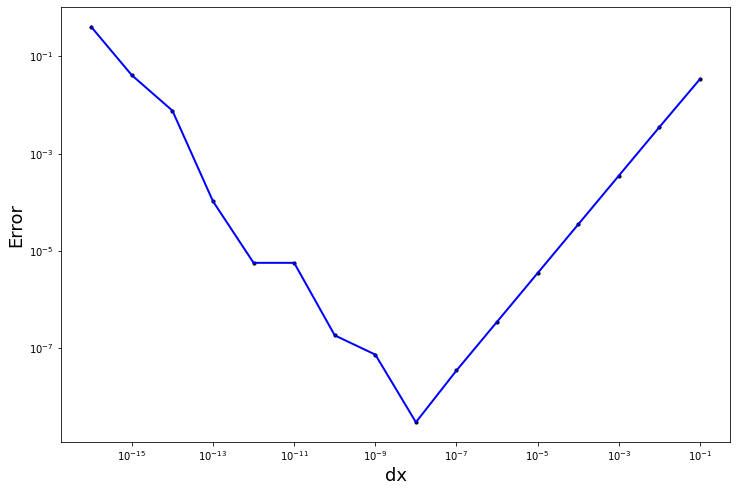

In [4]:
# 1)

def func(x):
    return np.cos(x)

dxlist = np.logspace(-16, -1, 16)
x = np.pi/4. 
yfwlist = derifw(func,x,dxlist)

fig = plt.figure(figsize = (12, 8))
plt.plot(dxlist, np.abs(yfwlist+np.sin(x)), 'b-', lw=2)  
plt.scatter(dxlist, np.abs(yfwlist+np.sin(x)), c = "black", s = 10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx', fontsize = 18)
plt.ylabel('Error', fontsize = 18)

plt.show()

n = 1 before dx reaches the optimal value. And the optimal value for dx is about $10^{-8}$.

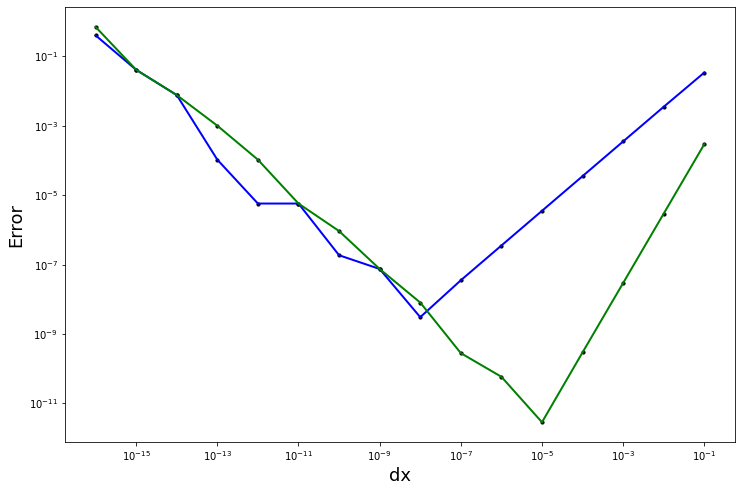

In [5]:
# 2)

dxlist = np.logspace(-16, -1, 16)
x = np.pi/4. 
ycdlist = dericd(func,x,dxlist)

fig = plt.figure(figsize = (12, 8))
plt.plot(dxlist, np.abs(yfwlist+np.sin(x)), 'b-', lw=2)  
plt.scatter(dxlist, np.abs(yfwlist+np.sin(x)), c = "black", s = 10)
plt.plot(dxlist, np.abs(ycdlist+np.sin(x)), 'g-', lw=2)  
plt.scatter(dxlist, np.abs(ycdlist+np.sin(x)), c = "black", s = 10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx', fontsize = 18)
plt.ylabel('Error', fontsize = 18)

plt.show()

Central difference scheme is better because it's truncation error is about $O(dx^2)$, which is lower than forward difference scheme. In this case, it will provide a higher optimal value, and a better precision.

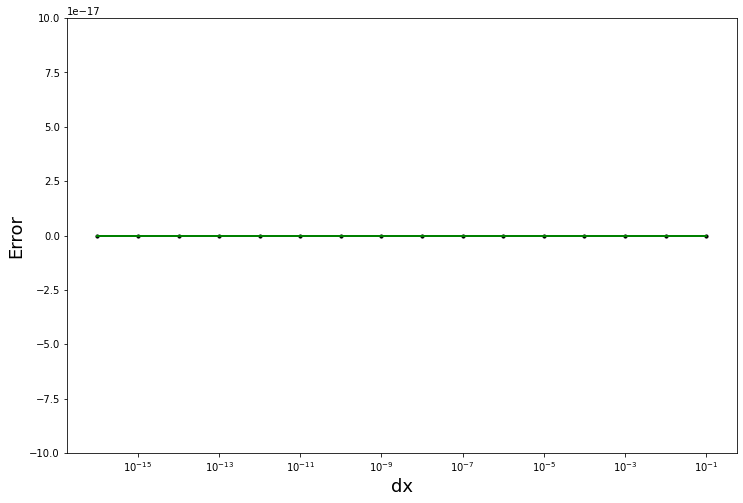

In [5]:
# 3)

def func(x):
    return np.cos(x)

dxlist = np.logspace(-16, -1, 16)
x = 0.
ycdlist = dericd(func,x,dxlist)

fig = plt.figure(figsize = (12, 8))
plt.plot(dxlist, np.abs(ycdlist+np.sin(x)), 'g-', lw=2)  
plt.scatter(dxlist, np.abs(ycdlist+np.sin(x)), c = "black", s = 10)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(-1e-16, 1e-16)
plt.xlabel('dx', fontsize = 18)
plt.ylabel('Error', fontsize = 18)

plt.show()

We find that the error is totally 0 now. If we plug in the derivative of cos:

\begin{equation}
\begin{aligned}
\frac{d y(t)}{dt}_{cd} &= \frac{y(t+h/2)-y(t-h/2)}{h}\\
&= \frac{cos(t+h/2)-cos(t-h/2)}{h} \,,
\end{aligned}
\end{equation}

when t = 0, 
\begin{equation}
\begin{aligned}
\frac{d y(0)}{dt}_{cd} &= \frac{cos(h/2)-cos(-h/2)}{h}\,.
\end{aligned}
\end{equation}

Since cos(x) = cos(-x), we have 
\begin{equation}
\begin{aligned}
\frac{d y(0)}{dt}_{cd} &= 0\,.
\end{aligned}
\end{equation}

Therefore, the truncation error is 0. In numpy, it is true that cos(x) = cos(-x) (no round-off error), so the total error is completely 0 in this case. 

This is actually due to the symmetry of sin/cos functions. So the truncation error of derivative for cos at $x = (0, \pi, 2\pi, ...)$ and sin at $x = (\frac12\pi, \frac32\pi, \frac52\pi ...)$ should also be zero. However, there is a round-off error when calculating np.pi. So the total error should be close to $10^{-16}$ except for the case where x = 0, as shown below. 

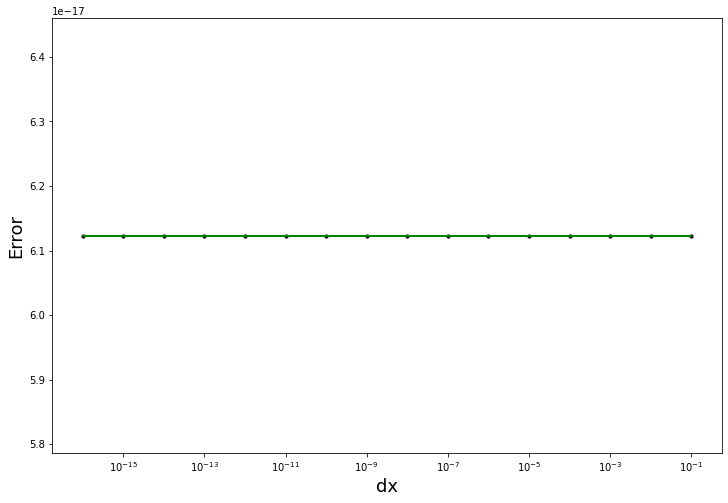

In [6]:

def func(x):
    return np.sin(x)

dxlist = np.logspace(-16, -1, 16)
x = np.pi/2.
ycdlist = dericd(func,x,dxlist)

fig = plt.figure(figsize = (12, 8))
plt.plot(dxlist, np.abs(ycdlist-np.cos(x)), 'g-', lw=2)  
plt.scatter(dxlist, np.abs(ycdlist-np.cos(x)), c = "black", s = 10)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('dx', fontsize = 18)
plt.ylabel('Error', fontsize = 18)

plt.show()